# SME0878 - MINERAÇÃO ESTATÍSTICA DE DADOS

TRABALHO 4

Nomes:
Aimê Gomes da Nobrega (Nro USP 11882429) <br>
Adriane Akemi Yamaguti (Nro USP 11915623)

Professor: Jorge Luis Bazan

---

---
---

# **ENTENDIMENTO DOS DADOS**

---

## **OBJETIVO: Coletar e fazer uma análise exploratória dos dados visando encontrar relações entre a variável objetivo (ViolentCrimesPerPop) e as covariáveis (demais variáveis)**

---


## Aquisição dos dados 

Os dados encontram-se no repositório https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime, contendo um conjunto de variáveis obtidas no CENSO de 1990 nos Estados Unidos.

O objetivo deste estudo é identificar quais atributos precisam serem melhorados para que a criminalidade diminua e forneça mais segurança para a população.

</br>

## Importação das bibliotecas

Neste projeto, foram importadas as seguintes bibliotecas:

In [24]:
import numpy as np
# from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Funções auxiliares

Criamos algumas funções para nos auxiliar ao longo deste trabalho:

In [25]:
def graph_by_state(df, col, estimator='mean', palette='winter'):
    if estimator == 'mean':
        state = df.groupby('state')[col].mean().reset_index()
    elif estimator == 'median':
        state = df.groupby('state')[col].median().reset_index()
    else:
        print('estimator not recognized')
    state.sort_values(by=col, ascending=False, inplace=True)
    
    plt.figure(figsize=(12,12))
    sns.barplot(data=state, y='state', x=col, palette=palette)
    plt.show()

def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')


def print_is_na(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    retorna um dataframe com a quantidade de dados duplicados
    em valor absoluto e a porcentagem relativa.
    """
    confirmation = df.isnull().values.any()
    print(f"Existem valores nulos? {confirmation}\n")
    if confirmation == True:
        na = pd.concat([df.isna().sum(), round((df.isna().sum()/df.shape[0])*100, 2)], axis = 1).reset_index()
        na.columns = ["coluna", "absoluto", "porcentagem"]
#         print(na )
        return na
    else:
        print('Não existem valores ausentes.')

## Leitura dos dados

In [26]:
# Leitura dos nomes das variáveis
attrib = pd.read_csv('attributes.csv', delim_whitespace = True)
# Conforme o dicionário de dados, precisamos ajustar o tipo de algumas colunas para trabalharmos de forma correta:
dtypes = {'state':'object', 'LemasGangUnitDeploy':'object', 'county':'Int64', 'community':'Int64'}
# Leitura da base
data = pd.read_csv('communities.data.csv', names = attrib['attributes'], dtype= dtypes, na_values=["?"])

In [27]:
print(f"O dataset possui {data.shape[0]} linhas e {data.shape[1]} colunas.")
# Mostra as 5 primeiras linhas
data.head()

O dataset possui 1994 linhas e 128 colunas.


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,<NA>,<NA>,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,<NA>,<NA>,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,<NA>,<NA>,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0

## Dicionário e estrutura do conjunto de dados

-- ```state <string>```: estado dos EUA

-- ```county <int>```: código numérico para município

-- ```community: <int>```: código numérico para comunidade

-- ```communityname <string>```: nome da comunidade
    
-- ```fold <int>```: número de fold para cross validation, serve para depuração e testes pareados
    
-- ```population <float>```: população para comunidade
    
-- ```householdsize <float>```: média de pessoas por família
    
-- ```racepctblack <float>```: porcentagem da população afro-americana
    
-- ```racePctWhite <float>```: porcentagem da população que é caucasiana
    
-- ```racePctAsian <float>```: porcentagem da população que é de origem asiática
    
-- ```racePctHisp <float>```: porcentagem da população que é de origem hispânica
    
-- ```agePct12t21 <float>```: porcentagem da população com idade entre 12 e 21 anos
    
-- ```agePct12t29 <float>```: porcentagem da população com idade entre 12 e 29 anos
    
-- ```agePct16t24 <float>```: porcentagem da população com idade entre 16 e 24 anos
    
-- ```agePct65up <float>```: porcentagem da população com 65 anos ou mais
    
-- ```numbUrbano <float>```: número de pessoas que vivem em áreas classificadas como urbanas
    
-- ```pctUrbano <float>```: percentual de pessoas que vivem em áreas classificadas como urbanas
    
-- ```medIncome <float>```: renda familiar mediana
    
-- ```pctWWage <float>```: porcentagem de domicílios com rendimentos salariais ou salariais em 1989
    
-- ```pctWFarmSelf <float>```: porcentagem de domicílios com renda agrícola ou por conta própria em 1989
    
-- ```pctWInvInc <float>```: porcentagem de domicílios com renda de investimento/aluguel em 1989
    
-- ```pctWSocSec <float>```: percentual de domicílios com renda previdenciária em 1989
    
-- ```pctWPubAsst <float>```: porcentagem de domicílios com renda de assistência pública em 1989
    
-- ```pctWRetire <float>```: percentual de domicílios com renda de aposentadoria em 1989
    
-- ```medFamInc <float>```: renda familiar mediana (difere da renda familiar para famílias não familiares)
    
-- ```perCapInc <float>```: renda per capita
    
-- ```whitePerCap <float>```: renda per capita para caucasianos
    
-- ```blackPerCap <float>```: renda per capita para afro-americanos
    
-- ```indianPerCap <float>```: renda per capita para americanos nativos
    
-- ```AsianPerCap <float>```: renda per capita para pessoas de origem asiática
    
-- ```OtherPerCap <float>```: renda per capita para pessoas com 'outros' patrimônios
    
-- ```HispPerCap <float>```: renda per capita para pessoas com ascendência hispânica
    
-- ```NumUnderPov <float>```: número de pessoas abaixo do nível de pobreza
    
-- ```PctPopUnderPov <float>```: percentual de pessoas abaixo do nível de pobreza
    
-- ```PctLess9thGrade <float>```: porcentagem de pessoas com 25 anos ou mais com menos de 9º ano de escolaridade
    
-- ```PctNotHSGrad <float>```: porcentagem de pessoas com 25 anos ou mais que não concluíram o ensino médio
    
-- ```PctBSorMore <float>```: percentual de pessoas de 25 anos ou mais com graduação ou ensino superior
    
-- ```PercentUnemployed <float>```: porcentagem de pessoas com 16 anos ou mais, na força de trabalho e desempregadas
    
-- ```PctEmploy <float>```: porcentagem de pessoas com 16 anos ou mais que estão empregadas
    
-- ```PctEmplManu <float>```: porcentagem de pessoas de 16 anos ou mais empregadas na manufatura
    
-- ```PctEmplProfServ <float>```: percentual de pessoas com 16 anos ou mais que trabalham em serviços profissionais
    
-- ```PctOccupManu <float>```: porcentagem de pessoas com 16 anos ou mais empregadas na manufatura
    
-- ```PctOccupMgmtProf <float>```: porcentagem de pessoas com 16 anos ou mais que estão empregadas em cargos gerenciais ou profissionais
    
-- ```MalePctDivorce <float>```: porcentagem de homens divorciados
    
-- ```MalePctNevMarr <float>```: porcentagem de homens que nunca se casaram
    
-- ```FemalePctDiv <float>```: porcentagem de mulheres divorciadas
    
-- ```TotalPctDiv <float>```: porcentagem da população que é divorciada
    
-- ```PersPerFam <float>```: número médio de pessoas por família
    
-- ```PctFam2Par <float>```: porcentagem de famílias (com filhos) chefiadas por dois pais
    
-- ```PctKids2Par <float>```: porcentagem de crianças em moradia familiar com os dois pais
    
-- ```PctYoungKids2Par <float>```: porcentagem de crianças de 4 anos ou menos em famílias com dois pais
    
-- ```PctTeen2Par <float>```: porcentagem de crianças de 12 a 17 anos em famílias com dois pais
    
-- ```PctWorkMomYoungKids <float>```: porcentagem de mães de crianças de 6 anos ou menos na força de trabalho
    
-- ```PctWorkMom <float>```: percentual de mães de menores de 18 anos na força de trabalho
    
-- ```NumIlleg <float>```: número de filhos nascidos que nunca se casaram

-- ```NumImmig <float>```: número total de pessoas conhecidas como estrangeiras

-- ```PctImmigRecent <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 3 anos

-- ```PctImmigRec5 <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 5 anos

-- ```PctImmigRec8 <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 8 anos

-- ```PctImmigRec10 <float>```: porcentagem de _imigrantes_ que imigraram nos últimos 10 anos

-- ```PctRecentImmig <float>```: porcentagem de _population_ que imigraram nos últimos 3 anos

-- ```PctRecImmig5 <float>```: porcentagem de _population_ que imigraram nos últimos 5 anos

-- ```PctRecImmig8 <float>```: porcentagem de _population_ que imigraram nos últimos 8 anos

-- ```PctRecImmig10 <float>```: porcentagem de _population_ que imigraram nos últimos 10 anos

-- ```PctSpeakEnglOnly <float>```: porcentagem de pessoas que falam apenas inglês

-- ```PctNotSpeakEnglWell <float>```: porcentagem de pessoas que não falam inglês bem

-- ```PctLargHouseFam <float>```: porcentagem de domicílios familiares grandes (6 ou mais)

-- ```PctLargHouseOccup <float>```: porcentagem de todos os domicílios ocupados que são grandes (6 ou mais pessoas)

-- ```PersPerOccupHous <float>```: média de pessoas por domicílio (numérico - decimal)

-- ```PersPerOwnOccHous <float>```: média de pessoas por domicílio ocupado pelo proprietário

-- ```PersPerRentOccHous <float>```: média de pessoas por domicílio alugado

-- ```PctPersOwnOccup <float>```: porcentagem de pessoas em domicílios ocupados pelo proprietário

-- ```PctPersDenseHous <float>```: porcentagem de pessoas em alojamentos densos (mais de 1 pessoa por cômodo)

-- ```PctHousLess3BR <float>```: percentual de domicílios com menos de 3 dormitórios

-- ```MedNumBR <float>```: número médio de quartos

-- ```HousVacant <float>```: número de domicílios vagos

-- ```PctHousOccup <float>```: porcentagem de habitação ocupada

-- ```PctHousOwnOcc <float>```: porcentagem de domicílios ocupados pelo proprietário

-- ```PctVacantBoarded <float>```: porcentagem de casas vagas que estão fechadas com tábuas

-- ```PctVacMore6Mos <float>```: percentual de moradias vazias que estão desocupadas há mais de 6 meses

-- ```MedYrHousBuilt <float>```: ano médio de unidades habitacionais construídas

-- ```PctHousNoPhone <float>```: percentual de domicílios ocupados sem telefone (em 1990, isso era raro!)

-- ```PctWOFullPlumb <float>```: percentual de habitação sem instalações hidráulicas completas

-- ```OwnOccLowQuart <float>```: habitação ocupada pelo proprietário - valor do quartil inferior

-- ```OwnOccMedVal <float>```: habitação ocupada pelo proprietário - valor mediano

-- ```OwnOccHiQuart <float>```: habitação ocupada pelo proprietário - valor do quartil superior

-- ```RentLowQ <float>```: casa alugada - aluguel do quartil inferior

-- ```RentMedian <float>```: aluguel de moradia - aluguel mediano (variável do Censo H32B do arquivo STF1A)

-- ```RentHighQ <float>```: casa alugada - aluguel do quartil superior

-- ```MedRent <float>```: aluguel bruto médio (variável do Censo H43A do arquivo STF3A - inclui utilitários)

-- ```MedRentPctHousInc <float>```: aluguel bruto mediano como uma porcentagem da renda familiar

-- ```MedOwnCostPctInc <float>```: custo médio dos proprietários como uma porcentagem da renda familiar - para 
proprietários com hipoteca

-- ```MedOwnCostPctIncNoMtg <float>```: custo médio dos proprietários como uma porcentagem da renda familiar - para proprietários sem hipoteca

-- ```NumInShelters <float>```: número de pessoas em abrigos para sem-teto

-- ```NumStreet <float>```: número de moradores de rua contados na rua

-- ```PctForeignBorn <float>```: porcentagem de pessoas nascidas no exterior

-- ```PctBornSameState <float>```: porcentagem de pessoas nascidas no mesmo estado em que vivem atualmente

-- ```PctSameHouse85 <float>```: porcentagem de pessoas vivendo na mesma casa em 1985 (5 anos antes)

-- ```PctSameCity85 <float>```: porcentagem de pessoas vivendo na mesma cidade em 1985 (5 anos antes)

-- ```PctSameState85 <float>```: porcentagem de pessoas vivendo no mesmo estado em 1985 (5 anos antes)

-- ```LemasSwornFT <float>```: número de policiais empossados em tempo integral

-- ```LemasSwFTPerPop <float>```: policiais em tempo integral empossados por 100 mil habitantes (numérico - decimal)

-- ```LemasSwFTFieldOps <float>```: número de policiais empossados em tempo integral em operações de campo (na rua em oposição a administrativas etc)

-- ```LemasSwFTFieldPerPop <float>```: policiais em tempo integral em operações de campo (na rua em oposição a administrativo etc) por 100 mil habitantes

-- ```LemasTotalReq <float>```: total de requisições para polícia

-- ```LemasTotReqPerPop <float>```: total de solicitações de policiais por 100 mil habitantes

-- ```PolicReqPerOffic <float>```: total de solicitações de policiais por policial

-- ```PolicPerPop <float>```: policiais por 100 mil habitantes

-- ```RacialMatchCommPol <float>```: uma medida da correspondência racial entre a comunidade e a força policial. Valores altos indicam que as proporções na comunidade e na força policial são semelhantes

-- ```PctPolicWhite <float>```: porcentagem de policiais caucasianos

-- ```PctPolicBlack <float>```: percentual de policiais afro-americanos

-- ```PctPolicHisp <float>```: porcentagem de policiais que são hispânicos

-- ```PctPolicAsian <float>```: porcentagem de policiais asiáticos

-- ```PctPolicMinor <float>```: porcentagem de policiais que são minoria de qualquer tipo

-- ```OficAssgnDrugUnits <float>```: número de policiais designados para unidades especiais de drogas

-- ```NumKindsDrugsSeiz <float>```: número de diferentes tipos de drogas apreendidas

-- ```PolicAveOTWorked <float>```: média de horas extras trabalhadas pela polícia

-- ```LandArea <float>```: área do terreno em milhas quadradas

-- ```PopDens <float>```: densidade populacional em pessoas por milha quadrada

-- ```PctUsePubTrans <float>```: percentual de pessoas que usam o transporte público para deslocamento

-- ```PolicCars <float>```: número de carros de polícia

-- ```PolicOperBudg <float>```: orçamento operacional da polícia

-- ```LemasPctPolicOnPatr <float>```: porcentagem de policiais em patrulha em tempo integral

-- ```LemasGangUnitDeploy <string>```: unidade de gangue implantada (0: NÃO, 1: SIM, 0.5: meio período)

-- ```LemasPctOfficDrugUn <float>```: porcentagem de policiais designados para unidades antidrogas

-- ```PolicBudgPerPop <float>```: orçamento operacional da polícia por população

-- ```ViolentCrimesPerPop <float>```: número total de crimes violentos por 100 mil habitantes

## Tratamento dos dados

Exibimos a leitura da tipagem dos dados:

In [28]:
# Exibe os tipos de cada coluna
data.dtypes

state                     object
county                     Int64
community                  Int64
communityname             object
fold                       int64
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCa

### Verificando duplicidade

Com a ajuda das nossas funções auxiliares criadas anteriormente, podemos verificar se existem dados duplicados.

In [29]:
print_is_duplicated(data)

Existem valores duplicados? False
Não existem linhas duplicadas.


### Verificando valores ausentes

Vamos verificar a existência de valores nulos e o quanto isso representa no nosso conjunto de dados:

In [30]:
df_na = print_is_na(data)
# Filtramos para apresentar somente as colunas com os valores ausentes
df_na = df_na.loc[df_na["absoluto"] != 0]
df_na

Existem valores nulos? True



,coluna,absoluto,porcentagem
1,county,1174,58.88
2,community,1177,59.03
30,OtherPerCap,1,0.05
101,LemasSwornFT,1675,84.00
102,LemasSwFTPerPop,1675,84.00
103,LemasSwFTFieldOps,1675,84.00
104,LemasSwFTFieldPerPop,1675,84.00
105,LemasTotalReq,1675,84.00
106,LemasTotReqPerPop,1675,84.00
107,PolicReqPerOffic,1675,84.00


In [31]:
len(df_na)

25

Existem 25 colunas em que alguns valores estão ausentes. Na maioria das colunas, os valores faltantes são nulos, exceto na coluna "OtherPerCap". Decidimos remover as colunas com um grande número de valores ausentes.

In [23]:
# Vamos tirar as colunas com valores nulos com exceção da coluna 'OtherPerCap'
data.drop(columns = df_na.loc[df_na["coluna"] != "OtherPerCap", "coluna"], inplace = True)

### Reduzindo o número de variáveis

Atributos irrelevantes para medir a criminalidade e melhorar a segurança incluem: <br>

- Raça: a raça de uma pessoa não é um fator determinante na probabilidade de ela cometer crimes. Focar na raça pode levar a discriminação e ações policiais injustas.

- Nacionalidade: assim como a raça, a nacionalidade não é um fator determinante na probabilidade de uma pessoa cometer crimes. Ações baseadas na nacionalidade podem levar a estigmatização e ações discriminatórias.

- Classe social: embora as pessoas de baixa renda sejam desproporcionalmente afetadas pela criminalidade, a classe social em si não é um fator determinante na probabilidade de uma pessoa cometer crimes. Focar apenas na classe social pode levar a generalizações injustas.

Ao invés disso, é importante focar em fatores como educação, oportunidades de trabalho, saúde mental e bem-estar social para prevenir a criminalidade e melhorar a segurança. Também é importante garantir a igualdade perante a lei e o tratamento justo para todas as pessoas, independentemente de sua raça, orientação sexual, nacionalidade ou classe social.

Assim, iremos excluir essas variáveis.

In [34]:
var_raca = ['racepctblack',
            'racePctWhite',
            'racePctAsian',
            'racePctHisp',
            'PctPolicWhite',
            'PctPolicBlack',
            'PctPolicHisp',
            'PctPolicAsian',
            'PctPolicMinor',]

var_nacionalidade = [
    'NumImmig',
    'PctImmigRecent',
    'PctImmigRec5',
    'PctImmigRec8',
    'PctImmigRec10',
    'PctRecentImmig',
    'PctRecImmig5',
    'PctRecImmig8',
    'PctRecImmig10',
    'PctForeignBorn',
    'PctBornSameState',
                     ]

var_classe_social = [
    'PctPopUnderPov',
    'medIncome',
    'pctWWage',
    'pctWFarmSelf',
    'pctWInvInc',
    'pctWSocSec',
    'pctWPubAsst',
    'pctWRetire',
    'medFamInc',
    'perCapInc',
    'NumUnderPov',
    'whitePerCap',
    'blackPerCap',
    'indianPerCap',
    'AsianPerCap',
    'OtherPerCap',
    'HispPerCap',
    'PctPopUnderPov',
]

In [35]:
var_irrelevantes = var_raca + var_nacionalidade + var_classe_social

# Vamos tirar as colunas que não serão utilizadas
data.drop(columns = var_irrelevantes, inplace = True)

In [36]:
data.shape

(1994, 91)

### Redução de complexidade

Iremos retirar variáveis altamente correlacionadas para evitar multicolinearidade e melhorar o desempenho do modelo.

In [37]:
correlacao = data.corr()

<AxesSubplot:>

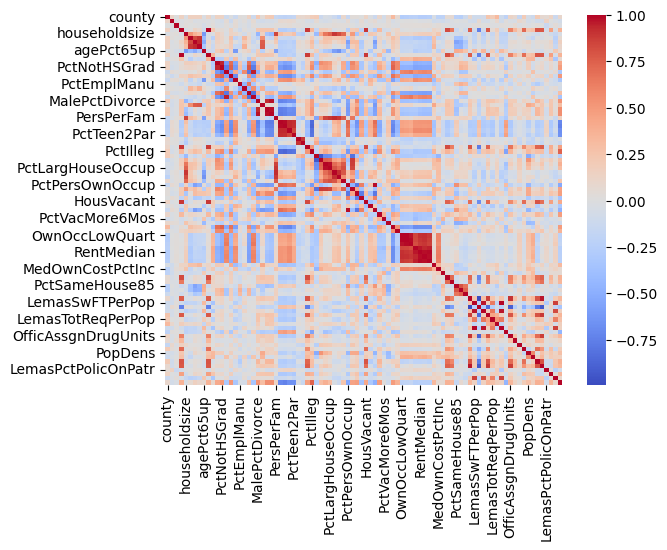

In [38]:
import seaborn as sns

sns.heatmap(correlacao, cmap='coolwarm')

In [39]:
colunas = set()
for i in range(len(correlacao.columns)):
    for j in range(i):
        if abs(correlacao.iloc[i, j]) > 0.8:
            coluna = correlacao.columns[i]
            colunas.add(coluna)
            if coluna in data.columns:
                del data[coluna]


In [40]:
data.shape

(1994, 52)

# ANÁLISE EXPLORATÓRIA DOS DADOS

## Análise univariada

### Análise do Target (ViolentCrimesPerPop: número total de crimes violentos por 100 mil habitantes)

A variável *ViolentCrimesPerPop* foi calculada usando a população e a soma das variáveis criminais consideradas crimes violentos nos Estados Unidos, tais como: homicídio, estupro, roubo e assalto. Aparentemente, houve alguma controvérsia em alguns estados sobre a contagem de estupros. Isso resultou em valores ausentes para estupro, o que resultou em valores incorretos para crimes violentos per capita. Essas cidades não estão incluídas no conjunto de dados. Muitas dessas comunidades omitidas eram do meio-oeste dos EUA

In [53]:
data.shape

(1994, 52)

Valores únicos para a coluna state:
6     278
34    211
48    156
25    121
39    109
42    101
12     90
9      69
55     60
18     48
37     46
36     46
1      43
29     42
53     40
13     37
40     36
47     35
51     33
41     31
45     28
21     26
44     26
5      25
8      25
49     24
22     22
33     21
4      20
19     20
28     19
23     17
54     14
24     12
35     10
46      9
38      8
16      7
27      7
56      7
32      5
50      4
2       3
20      1
11      1
10      1
Name: state, dtype: int64
Valores únicos para a coluna communityname:
Greenvillecity      5
Jacksonvillecity    5
Auburncity          5
Athenscity          4
Springfieldcity     4
                   ..
RedondoBeachcity    1
GrantsPasscity      1
FortWorthcity       1
Raleighcity         1
Ontariocity         1
Name: communityname, Length: 1828, dtype: int64
Estatísticas descritivas para a coluna fold:
count    1994.000000
mean        5.493982
std         2.873694
min         1.000000
25%         3.0

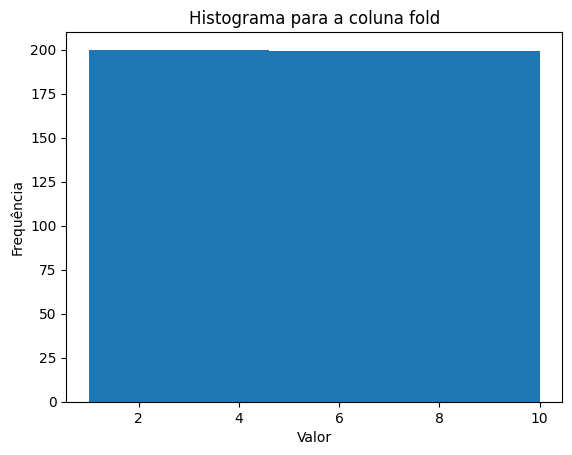

Estatísticas descritivas para a coluna population:
count    1994.000000
mean        0.057593
std         0.126906
min         0.000000
25%         0.010000
50%         0.020000
75%         0.050000
max         1.000000
Name: population, dtype: float64


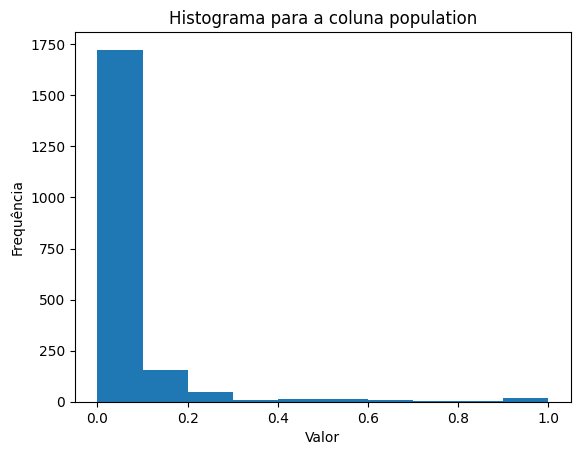

Estatísticas descritivas para a coluna householdsize:
count    1994.000000
mean        0.463395
std         0.163717
min         0.000000
25%         0.350000
50%         0.440000
75%         0.540000
max         1.000000
Name: householdsize, dtype: float64


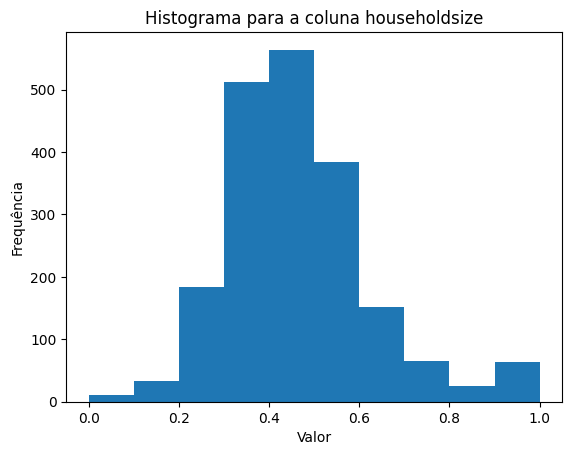

Estatísticas descritivas para a coluna agePct12t21:
count    1994.000000
mean        0.424218
std         0.155196
min         0.000000
25%         0.340000
50%         0.400000
75%         0.470000
max         1.000000
Name: agePct12t21, dtype: float64


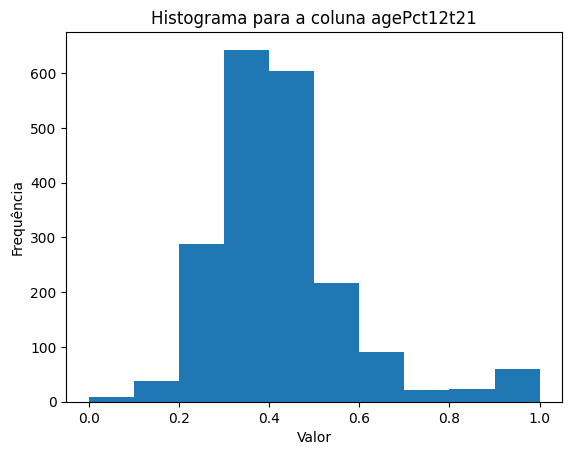

Estatísticas descritivas para a coluna agePct65up:
count    1994.000000
mean        0.423164
std         0.179185
min         0.000000
25%         0.300000
50%         0.420000
75%         0.530000
max         1.000000
Name: agePct65up, dtype: float64


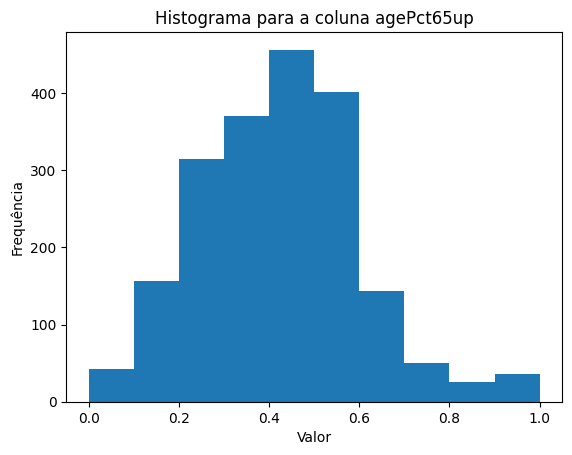

Estatísticas descritivas para a coluna pctUrban:
count    1994.000000
mean        0.696269
std         0.444811
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: pctUrban, dtype: float64


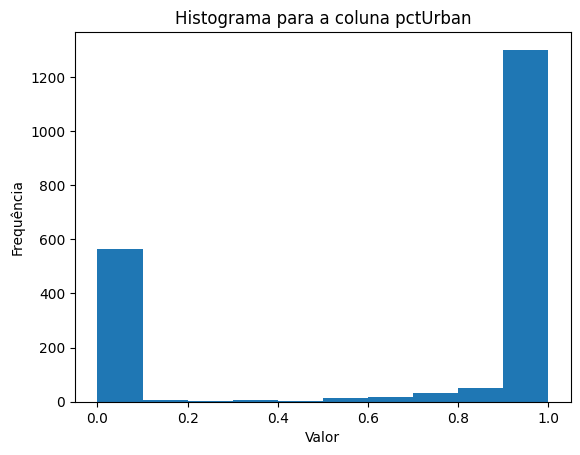

Estatísticas descritivas para a coluna PctLess9thGrade:
count    1994.000000
mean        0.315807
std         0.213360
min         0.000000
25%         0.160000
50%         0.270000
75%         0.420000
max         1.000000
Name: PctLess9thGrade, dtype: float64


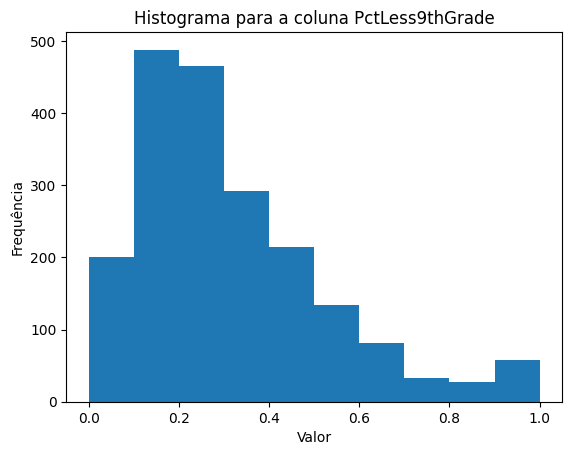

Estatísticas descritivas para a coluna PctBSorMore:
count    1994.000000
mean        0.361675
std         0.209193
min         0.000000
25%         0.210000
50%         0.310000
75%         0.460000
max         1.000000
Name: PctBSorMore, dtype: float64


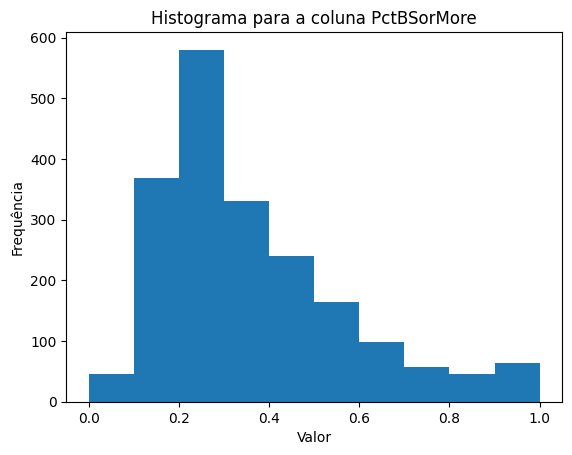

Estatísticas descritivas para a coluna PctUnemployed:
count    1994.000000
mean        0.363531
std         0.202171
min         0.000000
25%         0.220000
50%         0.320000
75%         0.480000
max         1.000000
Name: PctUnemployed, dtype: float64


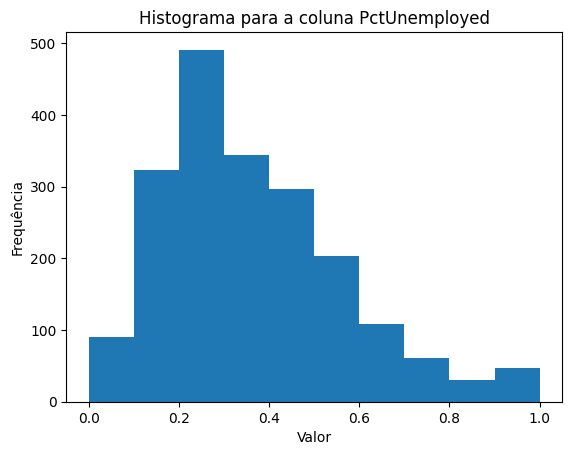

Estatísticas descritivas para a coluna PctEmploy:
count    1994.000000
mean        0.501073
std         0.174036
min         0.000000
25%         0.380000
50%         0.510000
75%         0.627500
max         1.000000
Name: PctEmploy, dtype: float64


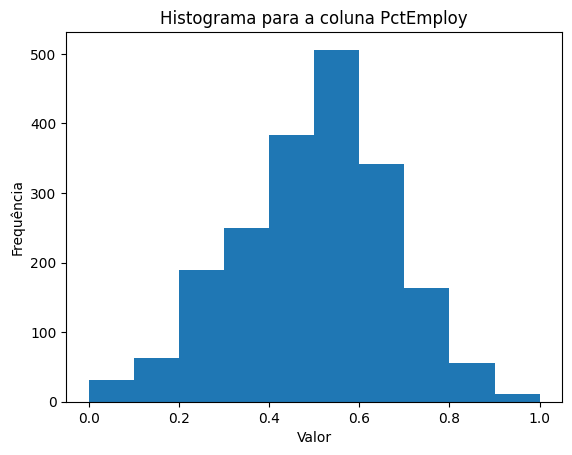

Estatísticas descritivas para a coluna PctEmplManu:
count    1994.000000
mean        0.396384
std         0.202386
min         0.000000
25%         0.250000
50%         0.370000
75%         0.520000
max         1.000000
Name: PctEmplManu, dtype: float64


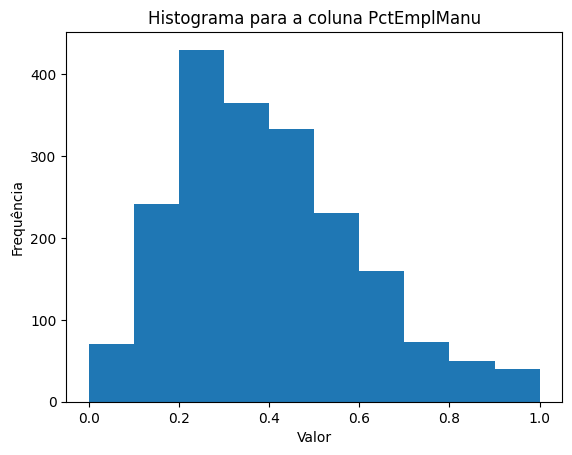

Estatísticas descritivas para a coluna PctEmplProfServ:
count    1994.000000
mean        0.440597
std         0.175457
min         0.000000
25%         0.320000
50%         0.410000
75%         0.530000
max         1.000000
Name: PctEmplProfServ, dtype: float64


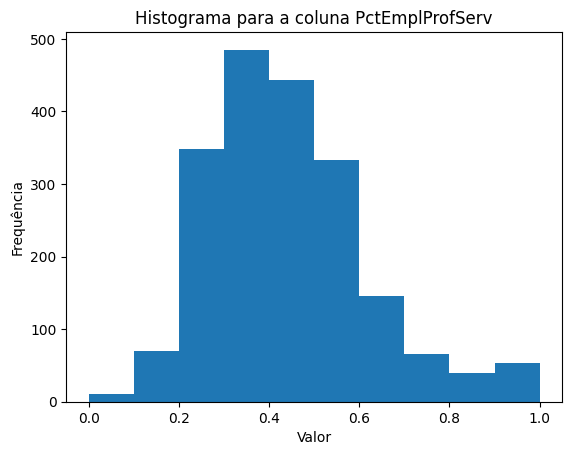

Estatísticas descritivas para a coluna PctOccupManu:
count    1994.000000
mean        0.391224
std         0.198922
min         0.000000
25%         0.240000
50%         0.370000
75%         0.510000
max         1.000000
Name: PctOccupManu, dtype: float64


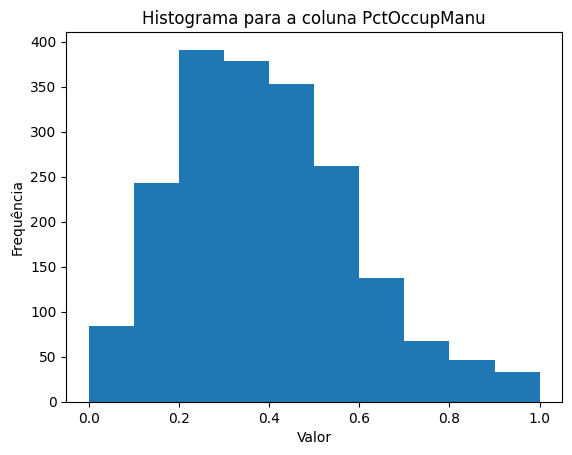

Estatísticas descritivas para a coluna MalePctDivorce:
count    1994.000000
mean        0.461244
std         0.182460
min         0.000000
25%         0.330000
50%         0.470000
75%         0.590000
max         1.000000
Name: MalePctDivorce, dtype: float64


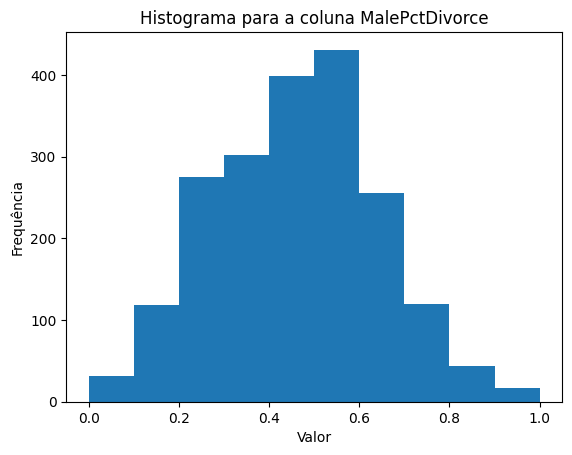

Estatísticas descritivas para a coluna MalePctNevMarr:
count    1994.000000
mean        0.434453
std         0.175437
min         0.000000
25%         0.310000
50%         0.400000
75%         0.500000
max         1.000000
Name: MalePctNevMarr, dtype: float64


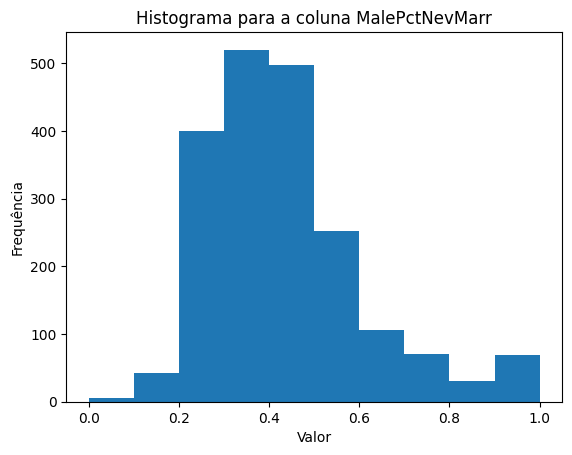

Estatísticas descritivas para a coluna PctFam2Par:
count    1994.000000
mean        0.610918
std         0.201976
min         0.000000
25%         0.490000
50%         0.630000
75%         0.760000
max         1.000000
Name: PctFam2Par, dtype: float64


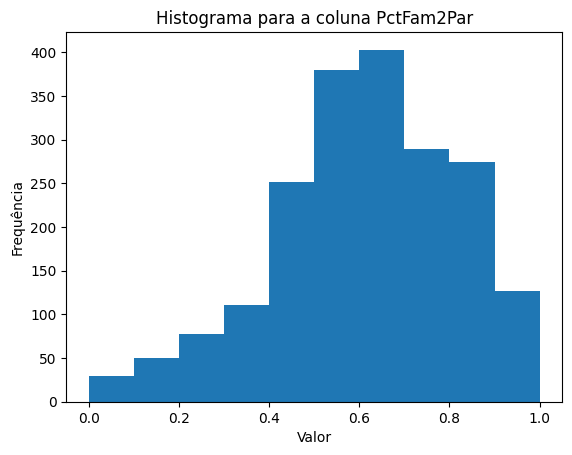

Estatísticas descritivas para a coluna PctWorkMomYoungKids:
count    1994.000000
mean        0.501449
std         0.168612
min         0.000000
25%         0.390000
50%         0.510000
75%         0.620000
max         1.000000
Name: PctWorkMomYoungKids, dtype: float64


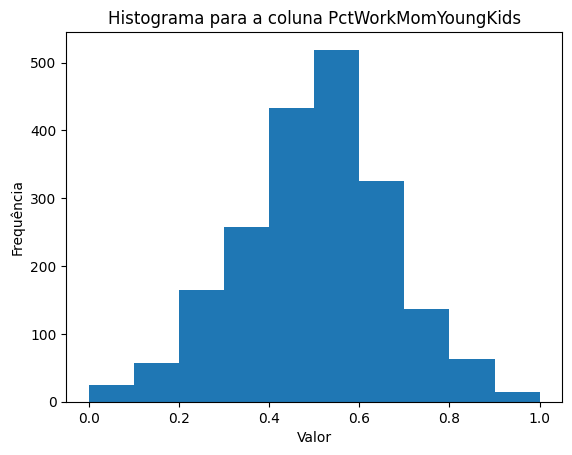

Estatísticas descritivas para a coluna PctSpeakEnglOnly:
count    1994.000000
mean        0.785903
std         0.226869
min         0.000000
25%         0.730000
50%         0.870000
75%         0.940000
max         1.000000
Name: PctSpeakEnglOnly, dtype: float64


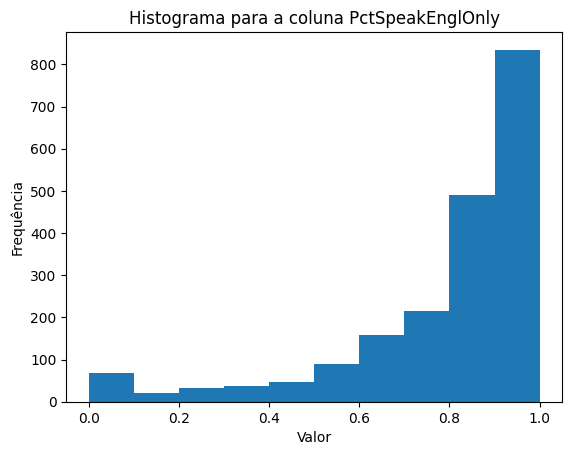

Estatísticas descritivas para a coluna PctPersOwnOccup:
count    1994.000000
mean        0.562598
std         0.197087
min         0.000000
25%         0.440000
50%         0.560000
75%         0.700000
max         1.000000
Name: PctPersOwnOccup, dtype: float64


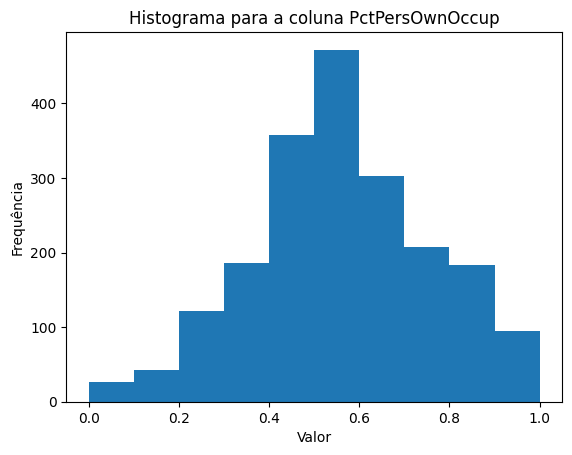

Estatísticas descritivas para a coluna PctHousLess3BR:
count    1994.000000
mean        0.495186
std         0.172508
min         0.000000
25%         0.400000
50%         0.510000
75%         0.600000
max         1.000000
Name: PctHousLess3BR, dtype: float64


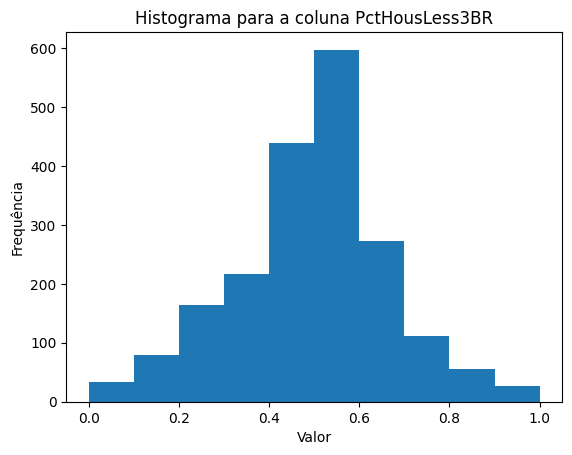

Estatísticas descritivas para a coluna MedNumBR:
count    1994.000000
mean        0.314694
std         0.255182
min         0.000000
25%         0.000000
50%         0.500000
75%         0.500000
max         1.000000
Name: MedNumBR, dtype: float64


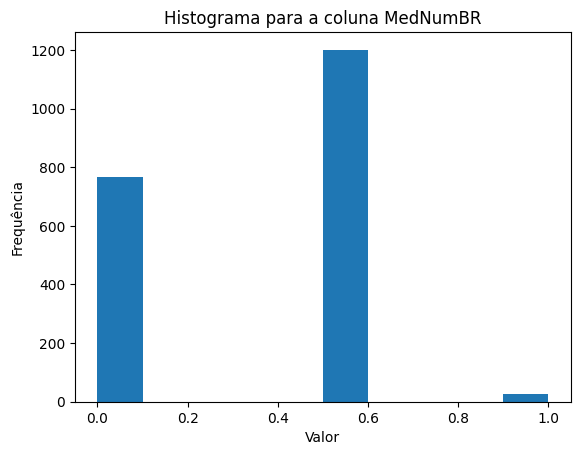

Estatísticas descritivas para a coluna PctHousOccup:
count    1994.000000
mean        0.719549
std         0.194024
min         0.000000
25%         0.630000
50%         0.770000
75%         0.860000
max         1.000000
Name: PctHousOccup, dtype: float64


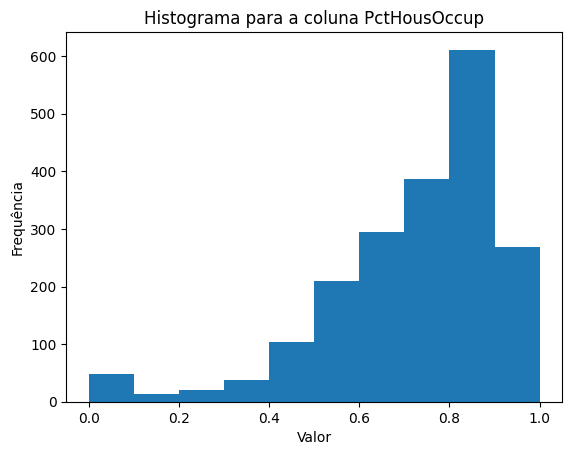

Estatísticas descritivas para a coluna PctVacantBoarded:
count    1994.000000
mean        0.204529
std         0.217770
min         0.000000
25%         0.060000
50%         0.130000
75%         0.270000
max         1.000000
Name: PctVacantBoarded, dtype: float64


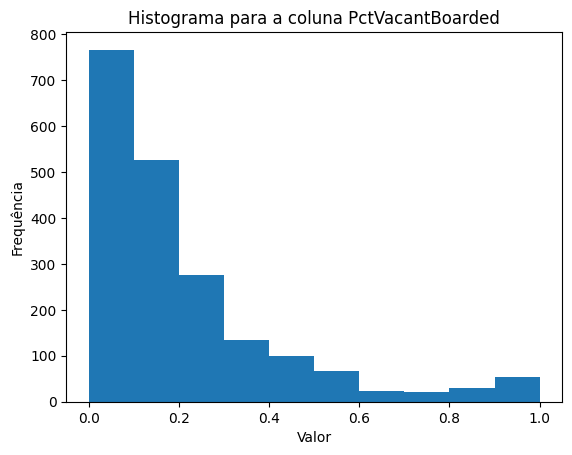

Estatísticas descritivas para a coluna PctVacMore6Mos:
count    1994.000000
mean        0.433335
std         0.188986
min         0.000000
25%         0.290000
50%         0.420000
75%         0.560000
max         1.000000
Name: PctVacMore6Mos, dtype: float64


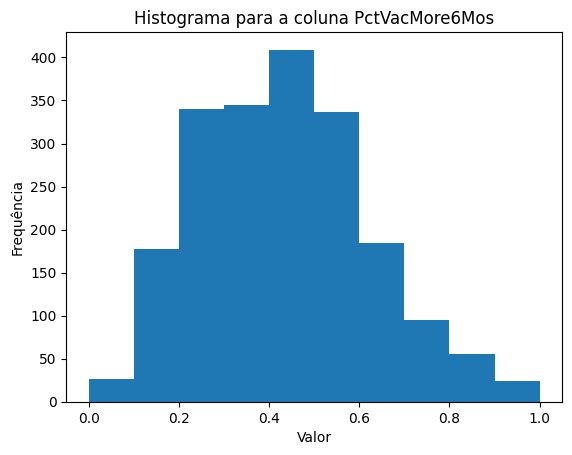

Estatísticas descritivas para a coluna MedYrHousBuilt:
count    1994.000000
mean        0.494178
std         0.232467
min         0.000000
25%         0.350000
50%         0.520000
75%         0.670000
max         1.000000
Name: MedYrHousBuilt, dtype: float64


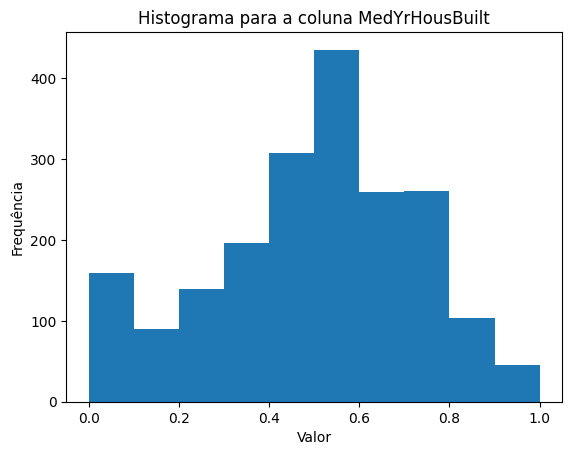

Estatísticas descritivas para a coluna PctHousNoPhone:
count    1994.000000
mean        0.264478
std         0.242847
min         0.000000
25%         0.060000
50%         0.185000
75%         0.420000
max         1.000000
Name: PctHousNoPhone, dtype: float64


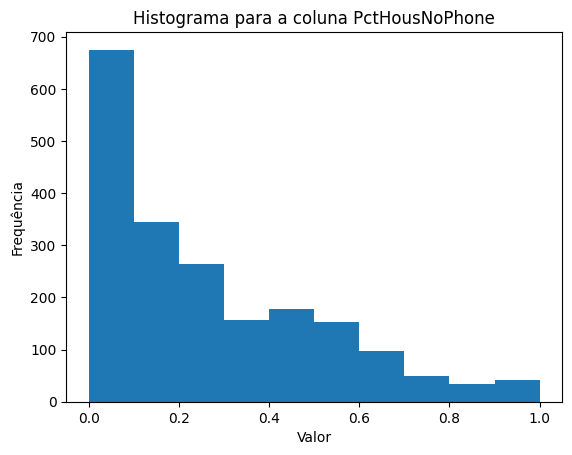

Estatísticas descritivas para a coluna PctWOFullPlumb:
count    1994.000000
mean        0.243059
std         0.206295
min         0.000000
25%         0.100000
50%         0.190000
75%         0.330000
max         1.000000
Name: PctWOFullPlumb, dtype: float64


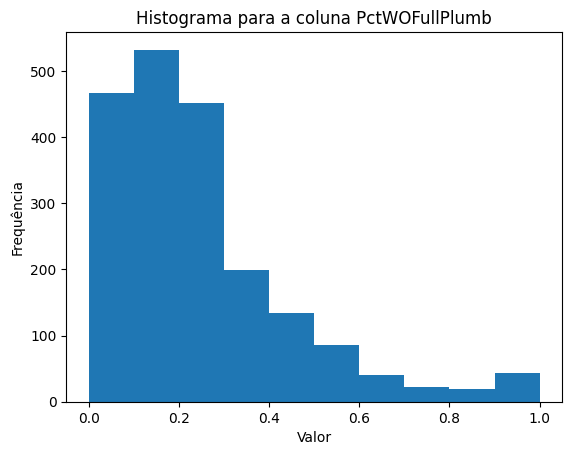

Estatísticas descritivas para a coluna OwnOccLowQuart:
count    1994.000000
mean        0.264689
std         0.224425
min         0.000000
25%         0.090000
50%         0.180000
75%         0.400000
max         1.000000
Name: OwnOccLowQuart, dtype: float64


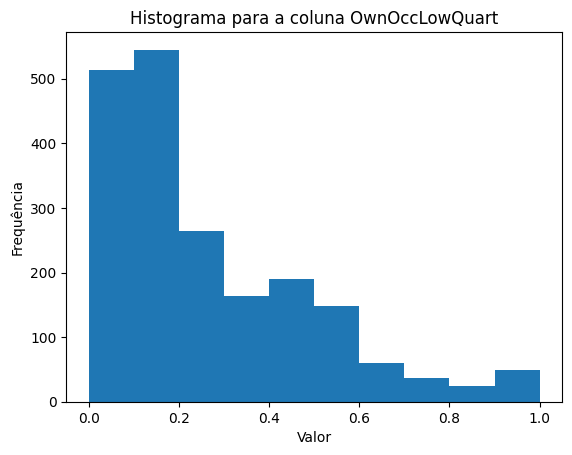

Estatísticas descritivas para a coluna MedRentPctHousInc:
count    1994.000000
mean        0.490125
std         0.169500
min         0.000000
25%         0.370000
50%         0.480000
75%         0.590000
max         1.000000
Name: MedRentPctHousInc, dtype: float64


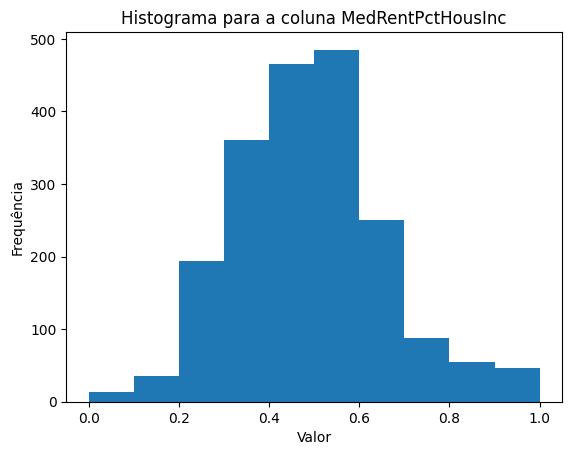

Estatísticas descritivas para a coluna MedOwnCostPctInc:
count    1994.000000
mean        0.449754
std         0.187274
min         0.000000
25%         0.320000
50%         0.450000
75%         0.580000
max         1.000000
Name: MedOwnCostPctInc, dtype: float64


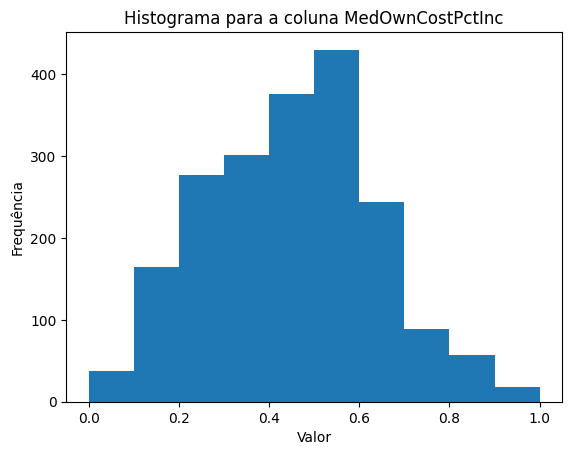

Estatísticas descritivas para a coluna MedOwnCostPctIncNoMtg:
count    1994.000000
mean        0.403816
std         0.192593
min         0.000000
25%         0.250000
50%         0.370000
75%         0.510000
max         1.000000
Name: MedOwnCostPctIncNoMtg, dtype: float64


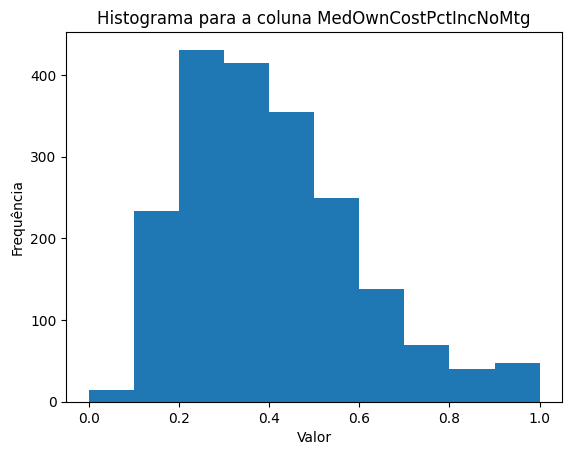

Estatísticas descritivas para a coluna NumStreet:
count    1994.000000
mean        0.022778
std         0.100400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: NumStreet, dtype: float64


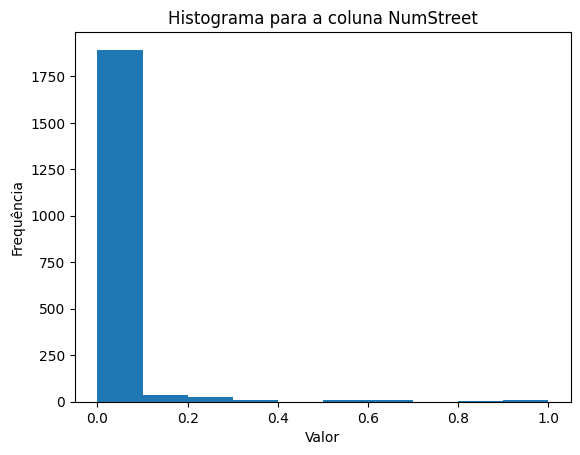

Estatísticas descritivas para a coluna PctSameHouse85:
count    1994.000000
mean        0.535050
std         0.181352
min         0.000000
25%         0.420000
50%         0.540000
75%         0.660000
max         1.000000
Name: PctSameHouse85, dtype: float64


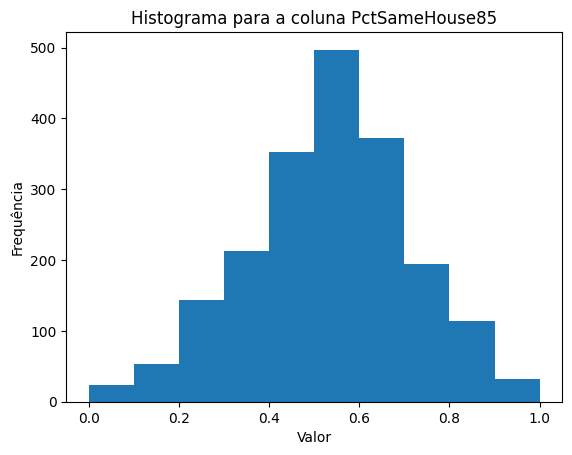

Estatísticas descritivas para a coluna PctSameState85:
count    1994.000000
mean        0.651530
std         0.198221
min         0.000000
25%         0.560000
50%         0.700000
75%         0.790000
max         1.000000
Name: PctSameState85, dtype: float64


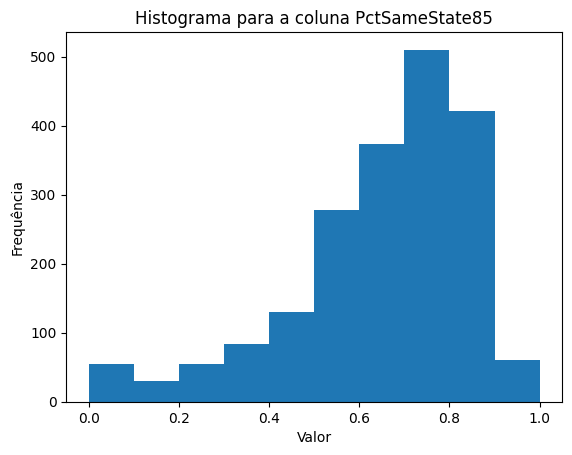

Estatísticas descritivas para a coluna LemasSwornFT:
count    319.000000
mean       0.069655
std        0.138238
min        0.000000
25%        0.010000
50%        0.020000
75%        0.060000
max        1.000000
Name: LemasSwornFT, dtype: float64


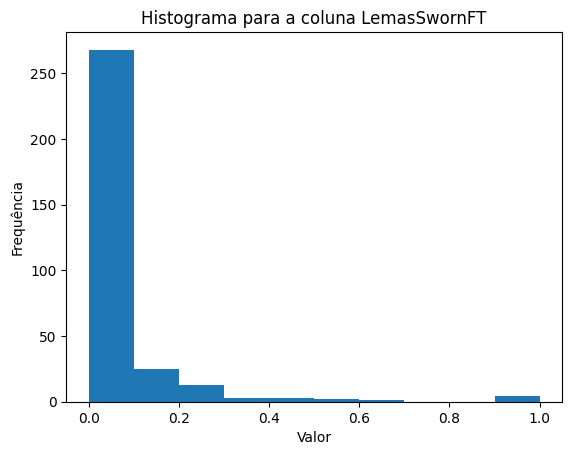

Estatísticas descritivas para a coluna LemasSwFTPerPop:
count    319.000000
mean       0.217461
std        0.159928
min        0.000000
25%        0.130000
50%        0.180000
75%        0.250000
max        1.000000
Name: LemasSwFTPerPop, dtype: float64


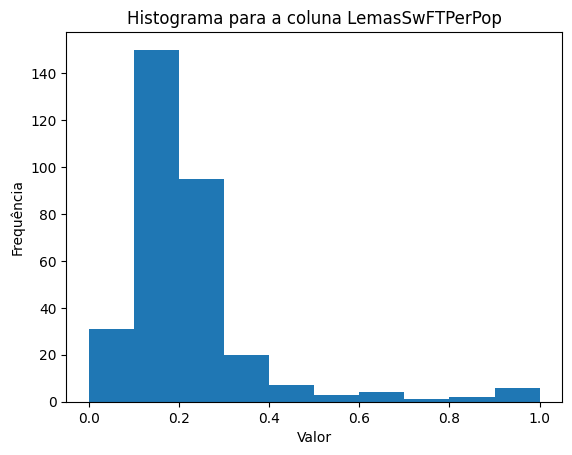

Estatísticas descritivas para a coluna LemasTotReqPerPop:
count    319.000000
mean       0.215204
std        0.164622
min        0.000000
25%        0.120000
50%        0.170000
75%        0.250000
max        1.000000
Name: LemasTotReqPerPop, dtype: float64


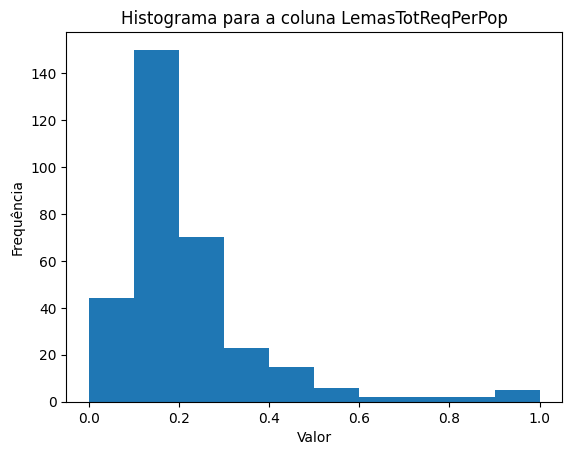

Estatísticas descritivas para a coluna PolicReqPerOffic:
count    319.000000
mean       0.343636
std        0.197181
min        0.000000
25%        0.220000
50%        0.290000
75%        0.435000
max        1.000000
Name: PolicReqPerOffic, dtype: float64


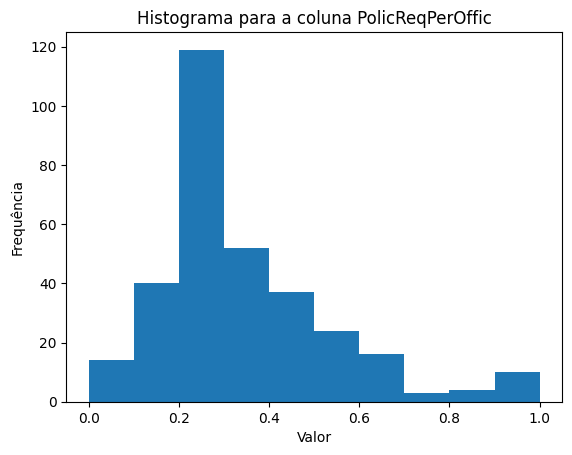

Estatísticas descritivas para a coluna RacialMatchCommPol:
count    319.000000
mean       0.689404
std        0.226811
min        0.000000
25%        0.560000
50%        0.740000
75%        0.860000
max        1.000000
Name: RacialMatchCommPol, dtype: float64


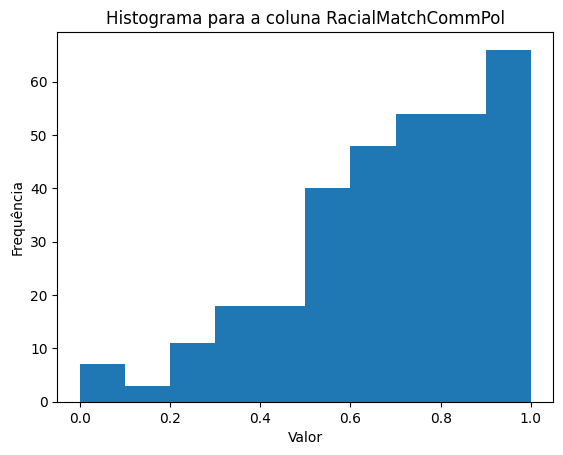

Estatísticas descritivas para a coluna NumKindsDrugsSeiz:
count    319.000000
mean       0.556050
std        0.203178
min        0.000000
25%        0.430000
50%        0.570000
75%        0.675000
max        1.000000
Name: NumKindsDrugsSeiz, dtype: float64


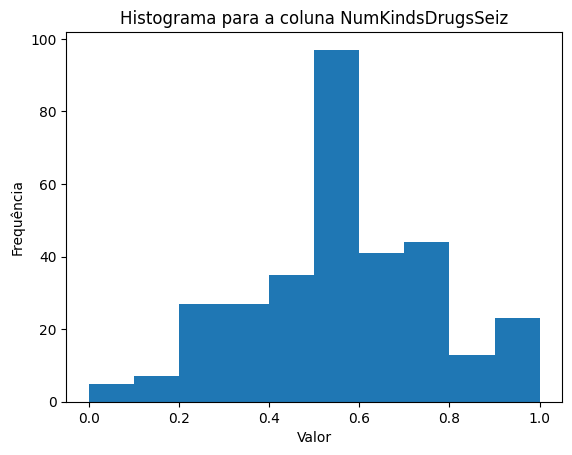

Estatísticas descritivas para a coluna PolicAveOTWorked:
count    319.000000
mean       0.305987
std        0.226884
min        0.000000
25%        0.140000
50%        0.260000
75%        0.395000
max        1.000000
Name: PolicAveOTWorked, dtype: float64


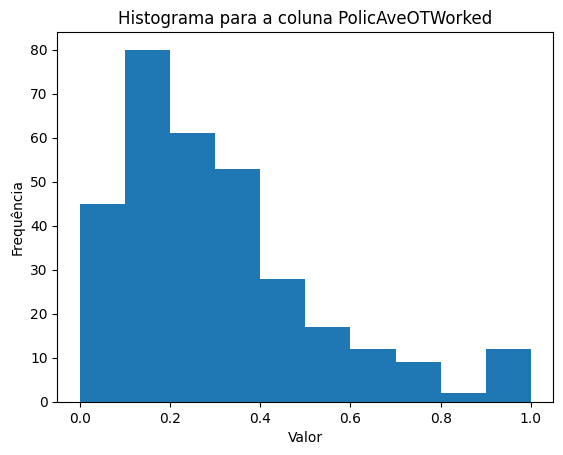

Estatísticas descritivas para a coluna LandArea:
count    1994.000000
mean        0.065231
std         0.109459
min         0.000000
25%         0.020000
50%         0.040000
75%         0.070000
max         1.000000
Name: LandArea, dtype: float64


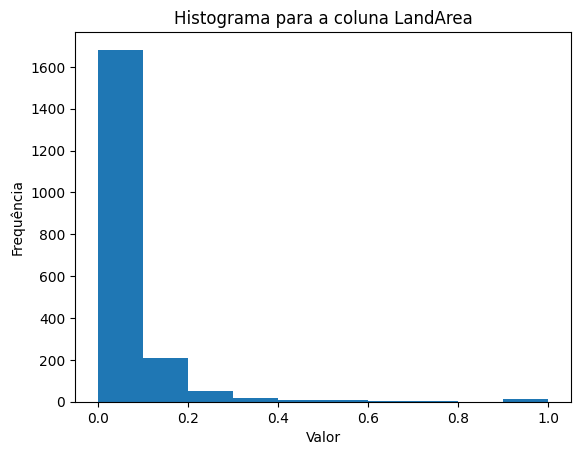

Estatísticas descritivas para a coluna PopDens:
count    1994.000000
mean        0.232854
std         0.203092
min         0.000000
25%         0.100000
50%         0.170000
75%         0.280000
max         1.000000
Name: PopDens, dtype: float64


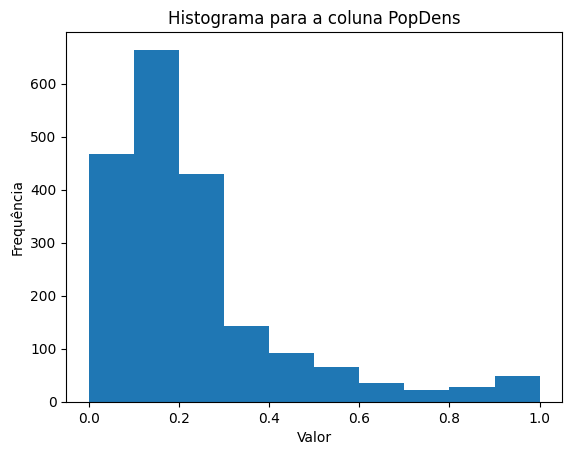

Estatísticas descritivas para a coluna PctUsePubTrans:
count    1994.000000
mean        0.161685
std         0.229055
min         0.000000
25%         0.020000
50%         0.070000
75%         0.190000
max         1.000000
Name: PctUsePubTrans, dtype: float64


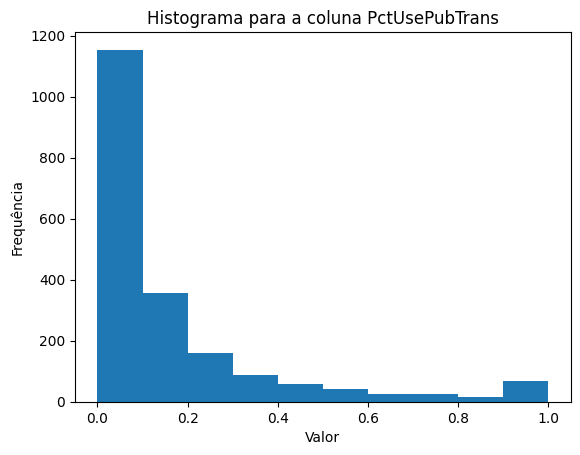

Estatísticas descritivas para a coluna LemasPctPolicOnPatr:
count    319.000000
mean       0.698589
std        0.213944
min        0.000000
25%        0.620000
50%        0.750000
75%        0.840000
max        1.000000
Name: LemasPctPolicOnPatr, dtype: float64


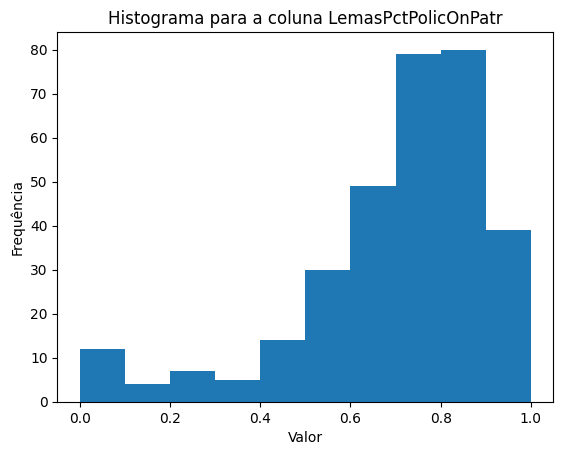

Valores únicos para a coluna LemasGangUnitDeploy:
0      126
0.5    105
1       88
Name: LemasGangUnitDeploy, dtype: int64
Estatísticas descritivas para a coluna LemasPctOfficDrugUn:
count    1994.000000
mean        0.094052
std         0.240328
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LemasPctOfficDrugUn, dtype: float64


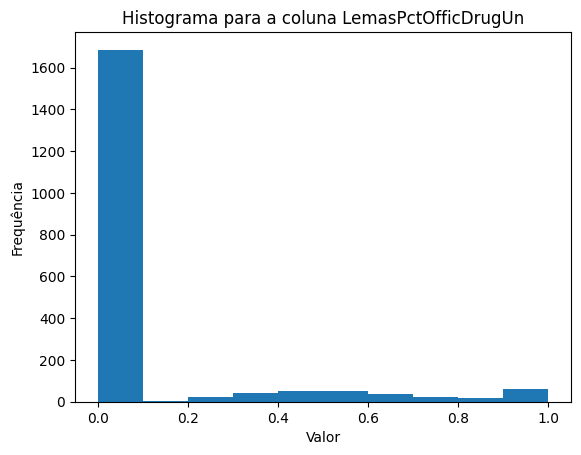

Estatísticas descritivas para a coluna ViolentCrimesPerPop:
count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64


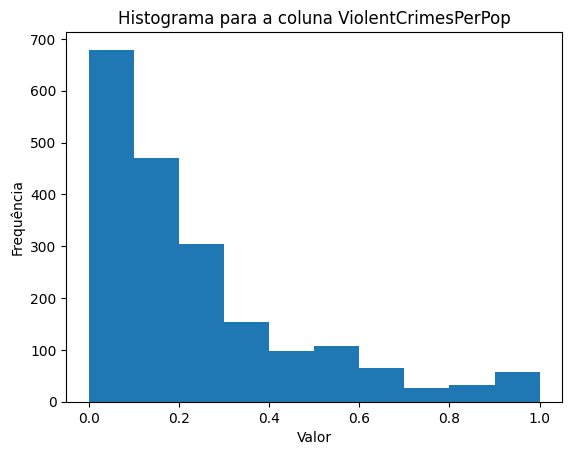

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Itera sobre as colunas do DataFrame
for col in data.columns:
    
    # Verifica o tipo de dado da coluna
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        
        # Calcula algumas estatísticas descritivas da coluna
        print(f'Estatísticas descritivas para a coluna {col}:')
        print(data[col].describe())
        
        # Gera um histograma da coluna
        plt.hist(data[col])
        plt.title(f'Histograma para a coluna {col}')
        plt.xlabel('Valor')
        plt.ylabel('Frequência')
        plt.show()
        
    elif data[col].dtype == 'object':
        
        # Conta os valores únicos na coluna
        print(f'Valores únicos para a coluna {col}:')
        print(data[col].value_counts())


<AxesSubplot:>

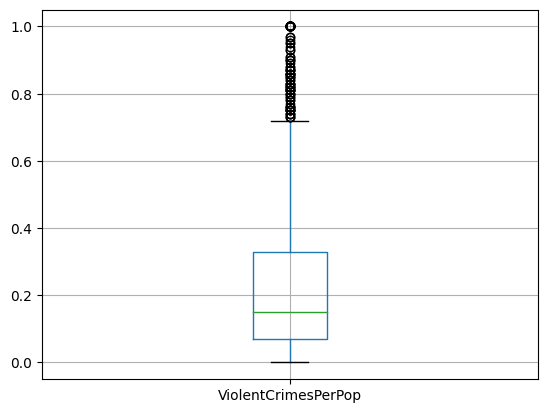

In [44]:
#Boxplot dos dados
data[['ViolentCrimesPerPop']].boxplot(column='ViolentCrimesPerPop')

### Análise univariada das covariáveis

In [46]:
df_covariaveis = data.drop(columns=['ViolentCrimesPerPop'], axis=1)
print(f"O dataset possui {df_covariaveis.shape[0]} linhas e {df_covariaveis.shape[1]} colunas.")
df_covariaveis.head()

O dataset possui 1994 linhas e 51 colunas.


,state,county,community,communityname,fold,population,householdsize,agePct12t21,agePct65up,pctUrban,PctLess9thGrade,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,MalePctDivorce,MalePctNevMarr,PctFam2Par,PctWorkMomYoungKids,PctSpeakEnglOnly,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumStreet,PctSameHouse85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasTotReqPerPop,PolicReqPerOffic,RacialMatchCommPol,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn
0,8,<NA>,<NA>,Lakewoodcity,1,0.19,0.33,0.34,0.32,1.0,0.10,0.48,0.27,0.68,0.23,0.41,0.25,0.68,0.40,0.55,0.74,0.89,0.55,0.51,0.5,0.71,0.05,0.26,0.65,0.14,0.06,0.22,0.38,0.46,0.25,0.0,0.50,0.64,0.03,0.13,0.18,0.44,0.94,0.57,0.29,0.12,0.26,0.20,0.9,0.5,0.32
1,53,<NA>,<NA>,Tukwilacity,1,0.00,0.16,0.26,0.27,1.0,0.14,0.30,0.27,0.73,0.57,0.15,0.42,1.00,0.63,0.43,0.46,0.84,0.26,0.82,0.0,0.79,0.02,0.25,0.65,0.16,0.00,0.21,0.29,0.32,0.18,0.0,0.34,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,0.00
2,24,<NA>,<NA>,Aberdeentown,1,0.00,0.42,0.39,0.32,0.0,0.27,0.19,0.36,0.58,0.32,0.29,0.49,0.63,0.41,0.42,0.71,0.88,0.42,0.51,0.5,0.86,0.29,0.30,0.52,0.47,0.45,0.18,0.48,0.39,0.28,0.0,0.54,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,0.00
3,34,5,81440,Willingborotownship,1,0.04,0.77,0.51,0.21,1.0,0.09,0.31,0.33,0.71,0.36,0.45,0.37,0.34,0.45,0.65,0.85,0.81,0.94,0.01,0.5,0.97,0.60,0.47,0.52,0.11,0.11,0.24,0.63,0.51,0.47,0.0,0.73,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,0.00
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.38,0.36,0.9,0.25,0.33,0.12,0.65,0.67,0.38,0.42,0.22,0.27,0.91,0.40,0.88,0.89,0.19,0.5,0.89,0.04,0.55,0.73,0.05,0.14,0.31,0.22,0.51,0.21,0.0,0.64,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,0.00


Verificando as estatísticas básicas de cada covariável:

- para variáveis categóricas:

In [47]:
df_covariaveis[['state', 'communityname', 'LemasGangUnitDeploy']].describe().T

,count,unique,top,freq
state,1994,46,6,278
communityname,1994,1828,Greenvillecity,5
LemasGangUnitDeploy,319,3,0,126


- para variáveis numéricas:

In [48]:
df_covariaveis.describe().T

,count,mean,std,min,25%,50%,75%,max
county,820.0,58.826829,126.420560,1.0,9.00,23.000,59.5000,840.0
community,817.0,46188.336597,25299.726569,70.0,25065.00,48090.000,66660.0000,94597.0
fold,1994.0,5.493982,2.873694,1.0,3.00,5.000,8.0000,10.0
population,1994.0,0.057593,0.126906,0.0,0.01,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.440,0.5400,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.34,0.400,0.4700,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.30,0.420,0.5300,1.0
pctUrban,1994.0,0.696269,0.444811,0.0,0.00,1.000,1.0000,1.0
PctLess9thGrade,1994.0,0.315807,0.213360,0.0,0.16,0.270,0.4200,1.0
PctBSorMore,1994.0,0.361675,0.209193,0.0,0.21,0.310,0.4600,1.0


## Análise bivariada

### Distribuição por estado

In [57]:
df_covariaveis

,state,county,community,communityname,fold,population,householdsize,agePct12t21,agePct65up,pctUrban,PctLess9thGrade,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,MalePctDivorce,MalePctNevMarr,PctFam2Par,PctWorkMomYoungKids,PctSpeakEnglOnly,PctPersOwnOccup,PctHousLess3BR,MedNumBR,PctHousOccup,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumStreet,PctSameHouse85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasTotReqPerPop,PolicReqPerOffic,RacialMatchCommPol,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn
0,8,<NA>,<NA>,Lakewoodcity,1,0.19,0.33,0.34,0.32,1.0,0.10,0.48,0.27,0.68,0.23,0.41,0.25,0.68,0.40,0.55,0.74,0.89,0.55,0.51,0.5,0.71,0.05,0.26,0.65,0.14,0.06,0.22,0.38,0.46,0.25,0.00,0.50,0.64,0.03,0.13,0.18,0.44,0.94,0.57,0.29,0.12,0.26,0.20,0.90,0.5,0.32
1,53,<NA>,<NA>,Tukwilacity,1,0.00,0.16,0.26,0.27,1.0,0.14,0.30,0.27,0.73,0.57,0.15,0.42,1.00,0.63,0.43,0.46,0.84,0.26,0.82,0.0,0.79,0.02,0.25,0.65,0.16,0.00,0.21,0.29,0.32,0.18,0.00,0.34,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.12,0.45,NaN,NaN,0.00
2,24,<NA>,<NA>,Aberdeentown,1,0.00,0.42,0.39,0.32,0.0,0.27,0.19,0.36,0.58,0.32,0.29,0.49,0.63,0.41,0.42,0.71,0.88,0.42,0.51,0.5,0.86,0.29,0.30,0.52,0.47,0.45,0.18,0.48,0.39,0.28,0.00,0.54,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.21,0.02,NaN,NaN,0.00
3,34,5,81440,Willingborotownship,1,0.04,0.77,0.51,0.21,1.0,0.09,0.31,0.33,0.71,0.36,0.45,0.37,0.34,0.45,0.65,0.85,0.81,0.94,0.01,0.5,0.97,0.60,0.47,0.52,0.11,0.11,0.24,0.63,0.51,0.47,0.00,0.73,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.39,0.28,NaN,NaN,0.00
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.38,0.36,0.9,0.25,0.33,0.12,0.65,0.67,0.38,0.42,0.22,0.27,0.91,0.40,0.88,0.89,0.19,0.5,0.89,0.04,0.55,0.73,0.05,0.14,0.31,0.22,0.51,0.21,0.00,0.64,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.09,0.02,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,<NA>,<NA>,TempleTerracecity,10,0.01,0.40,0.43,0.30,1.0,0.08,0.65,0.12,0.71,0.17,0.68,0.14,0.39,0.41,0.63,0.78,0.78,0.55,0.49,0.5,0.75,0.00,0.21,0.79,0.07,0.09,0.20,0.50,0.48,0.39,0.00,0.34,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.28,0.05,NaN,NaN,0.00
1990,6,<NA>,<NA>,Seasidecity,10,0.05,0.96,0.69,0.14,1.0,0.33,0.22,0.24,0.77,0.10,0.41,0.22,0.42,0.75,0.66,0.32,0.55,0.12,0.60,0.0,0.80,0.17,0.13,0.50,0.17,0.37,0.36,0.69,0.67,0.31,0.00,0.17,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.37,0.20,NaN,NaN,0.00
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.35,0.54,1.0,0.52,0.21,0.50,0.46,0.63,0.40,0.54,0.50,0.53,0.42,0.38,0.60,0.38,0.66,0.0,0.65,0.53,0.45,0.29,0.31,0.29,0.33,0.52,0.58,0.53,0.02,0.61,0.76,0.06,0.30,0.17,0.19,0.97,0.36,0.25,0.08,0.32,0.18,0.78,0,0.91
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.58,0.41,1.0,0.30,0.42,0.37,0.57,0.44,0.57,0.27,0.32,0.87,0.64,0.57,0.68,0.39,0.64,0.0,0.84,0.17,0.34,0.23,0.10,0.34,0.54,0.43,0.44,0.40,0.01,0.54,0.52,0.02,0.25,0.11,0.14,0.91,0.57,0.19,0.03,0.38,0.33,0.79,0,0.22


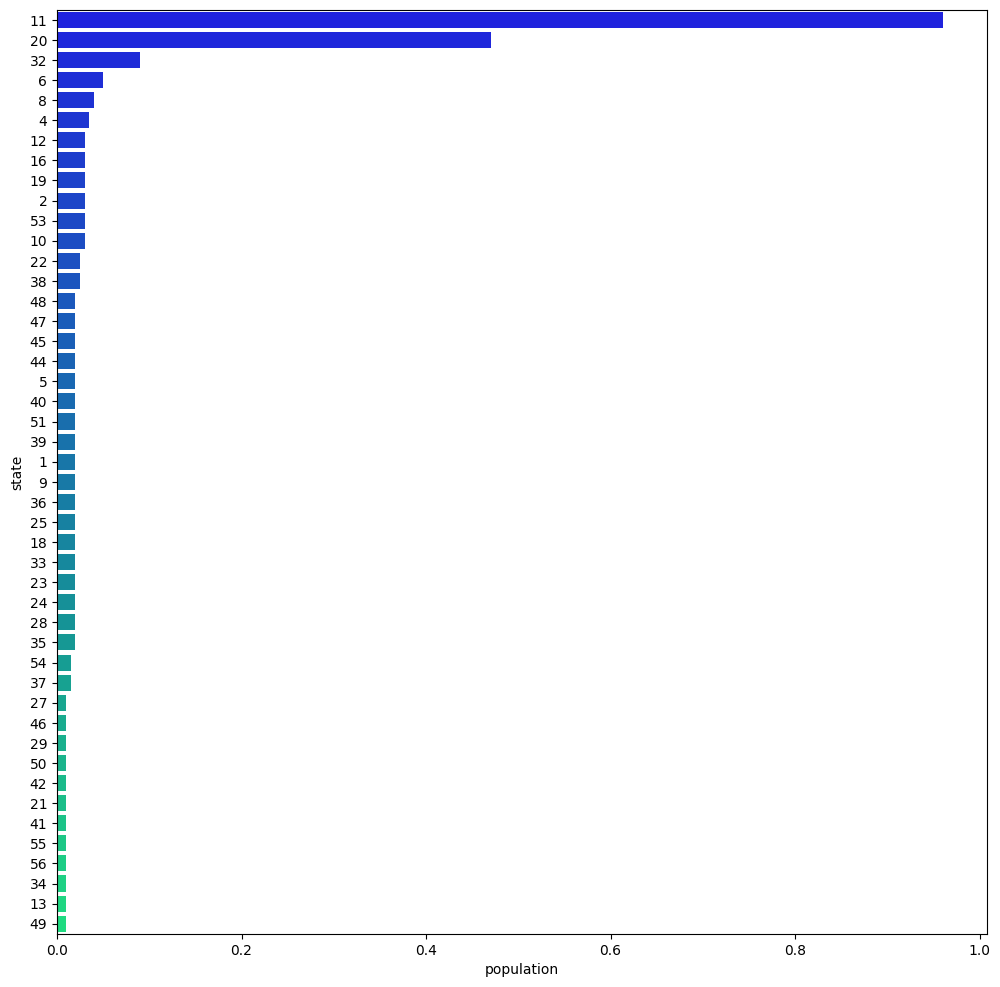

In [58]:
graph_by_state(df=df_covariaveis, col= 'population', estimator='median')

Os 5 estados com maiores densidade demográficas são: 11, 20, 32, 6 e 8. Já os 5 estados com menores índices demográficos são: 55, 56, 34, 13 e 49.

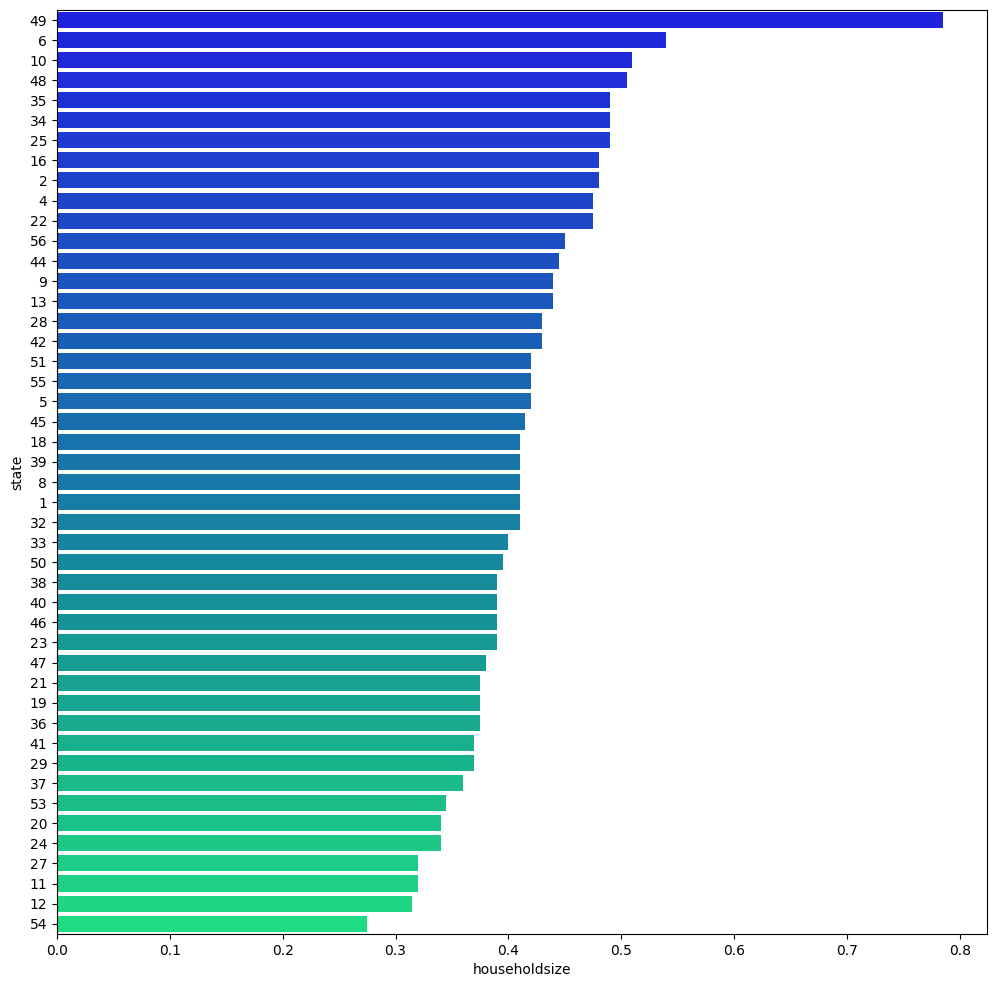

In [59]:
graph_by_state(df= data, col= 'householdsize', estimator='median')

O estado 49 possui o maior tamanho familiar, enquanto que o estado 54 o menor.

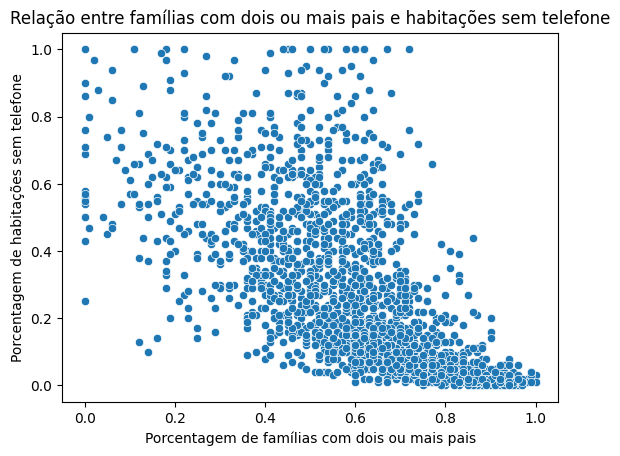

In [67]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando colunas
selected_cols = ['PctFam2Par', 'PctHousNoPhone', 'ViolentCrimesPerPop']

# Gerando gráfico de dispersão entre PctFam2Par e PctHousNoPhone
sns.scatterplot(data=data, x='PctFam2Par', y='PctHousNoPhone')
plt.xlabel('Porcentagem de famílias com dois ou mais pais')
plt.ylabel('Porcentagem de habitações sem telefone')
plt.title('Relação entre famílias com dois ou mais pais e habitações sem telefone')
plt.show()

 Podemos ver uma tendência negativa entre essas variáveis, ou seja, quanto maior a porcentagem de famílias com dois ou mais pais, menor a porcentagem de habitações sem telefone. Isso pode ser explicado pelo fato de que famílias com dois ou mais pais podem ter uma renda mais alta e, portanto, mais acesso a serviços como telefone.

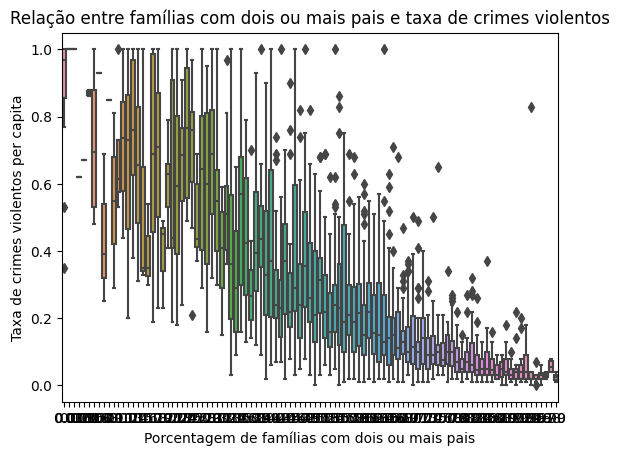

In [68]:
# Gerando gráfico de caixa entre PctFam2Par e ViolentCrimesPerPop
sns.boxplot(data=data, x='PctFam2Par', y='ViolentCrimesPerPop')
plt.xlabel('Porcentagem de famílias com dois ou mais pais')
plt.ylabel('Taxa de crimes violentos per capita')
plt.title('Relação entre famílias com dois ou mais pais e taxa de crimes violentos')
plt.show()


 Podemos ver que a mediana da taxa de crimes violentos é menor para áreas com maior porcentagem de famílias com dois ou mais pais. Isso sugere que a presença de famílias com dois ou mais pais pode estar associada a uma comunidade mais coesa e, portanto, a menos crimes violentos. No entanto, devemos ter em mente que correlação não implica causalidade, e outras variáveis podem estar afetando essa relação. Além disso, devemos considerar o fato de que essas variáveis podem estar correlacionadas com outras variáveis não incluídas em nossa análise.

## Análise multivariada

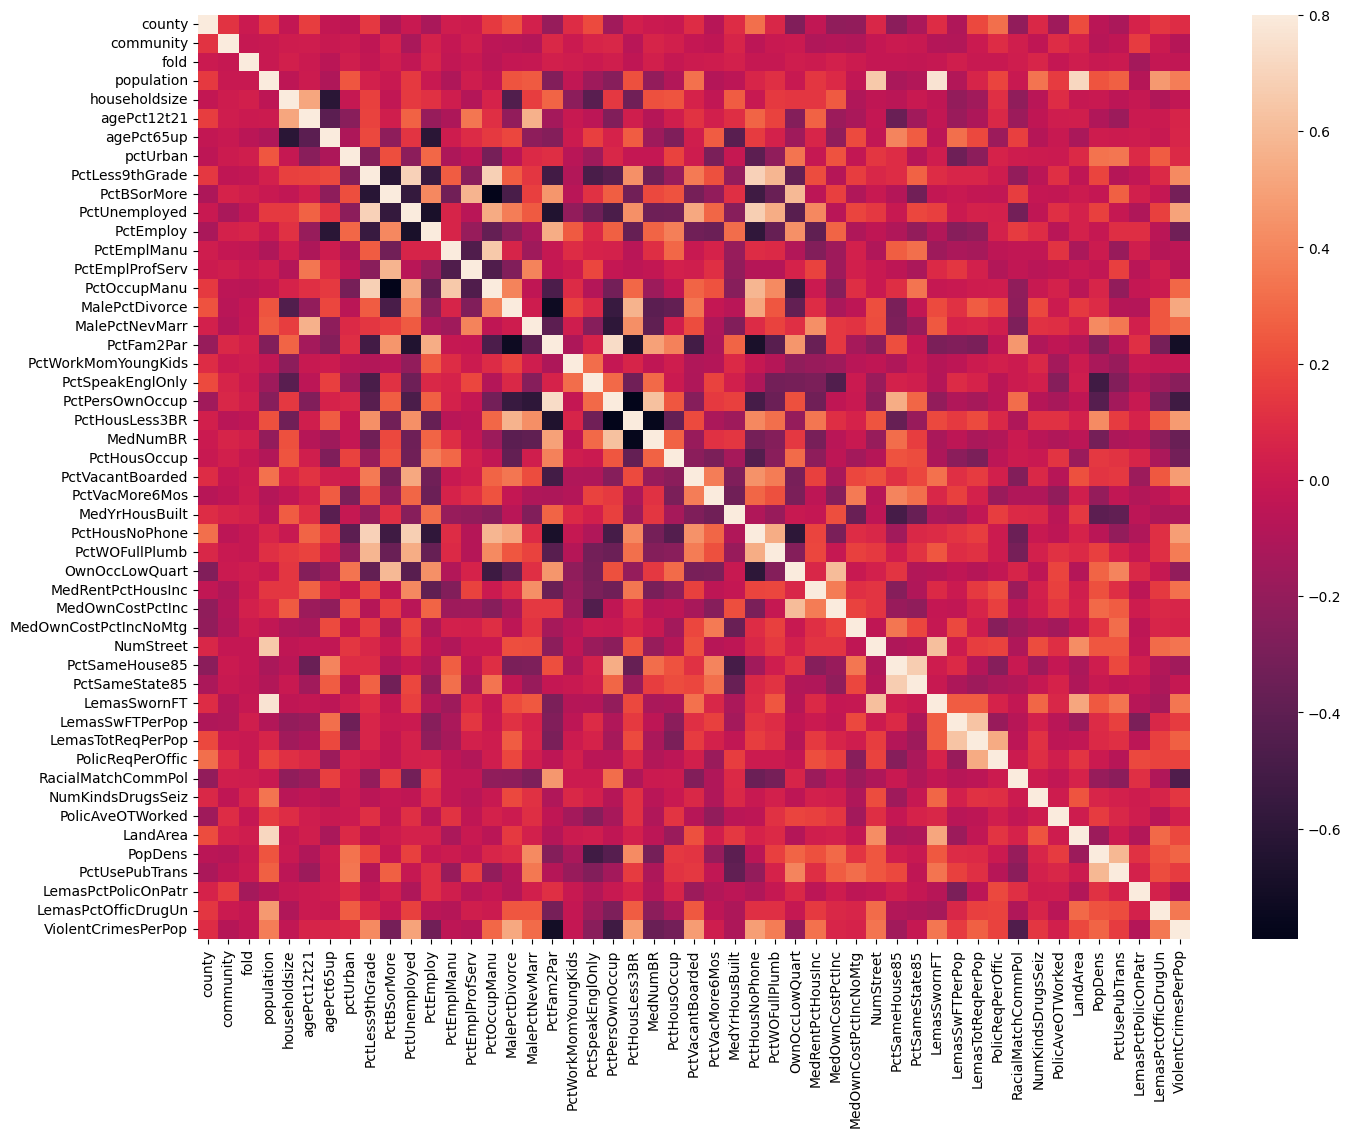

In [51]:
corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

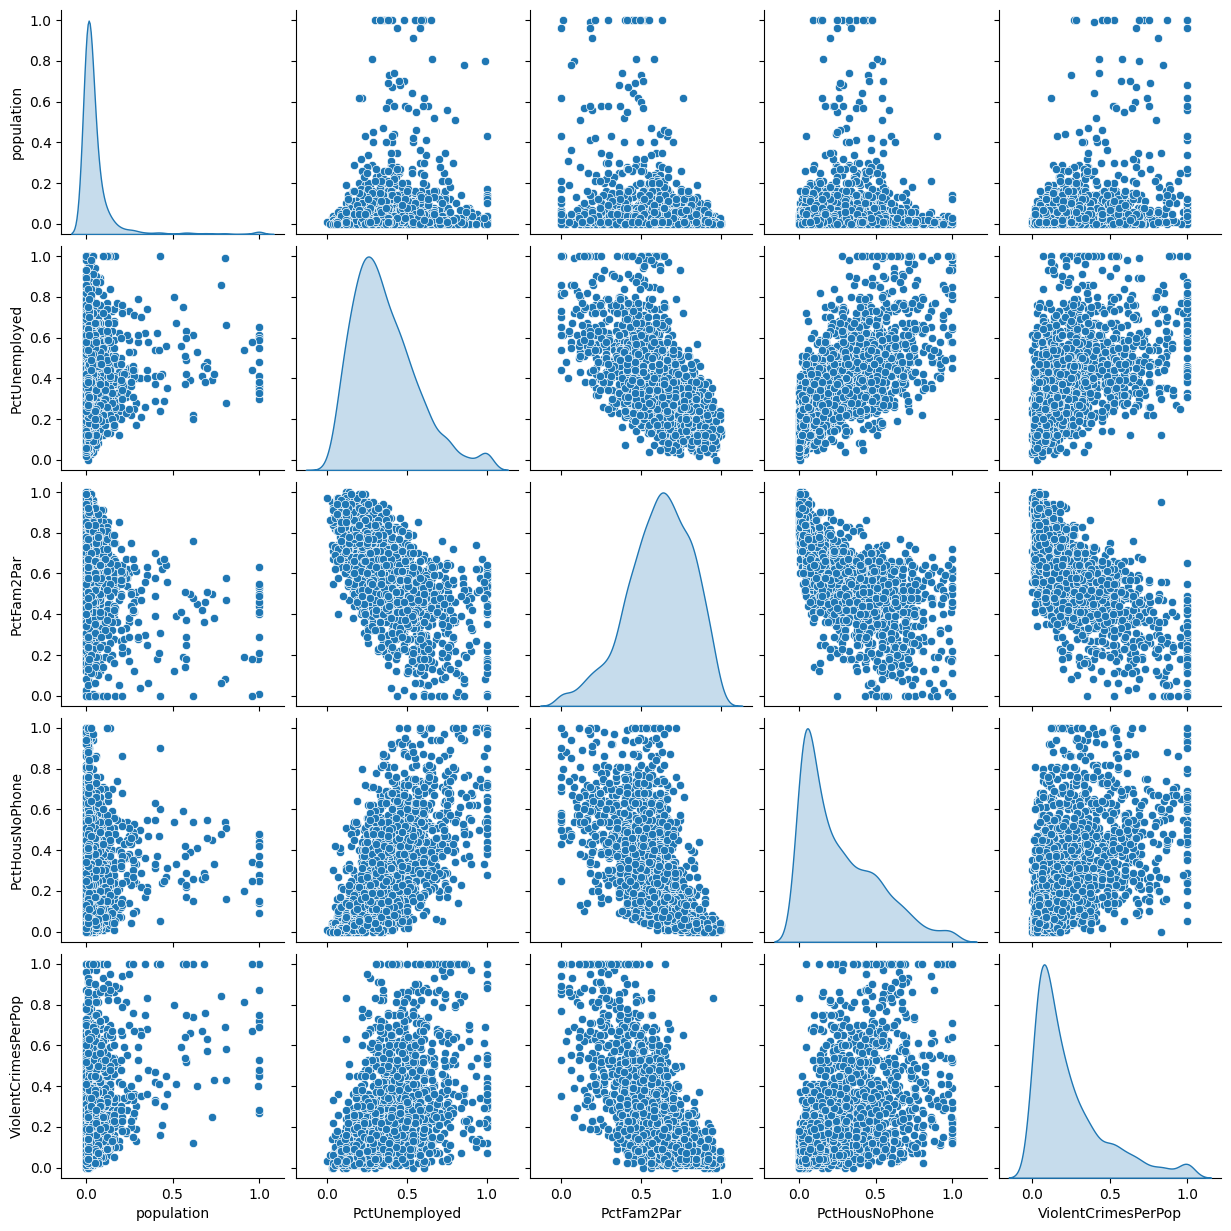

In [62]:
selected_cols = ['population', 'PctUnemployed', 'PctFam2Par', 'PctHousNoPhone', 'ViolentCrimesPerPop']
df = data[selected_cols]

sns.pairplot(df, diag_kind='kde')
plt.show()

A partir desse gráfico, podemos ver que a maioria das variáveis tem uma distribuição assimétrica, com uma cauda mais longa à direita, o que indica a presença de valores extremos ou outliers em nossos dados. Além disso, podemos ver que as variáveis estão correlacionadas entre si de maneiras diferentes. Por exemplo, a porcentagem de famílias com duas pessoas ou mais parece estar negativamente correlacionada com a taxa de crimes violentos per capita, enquanto a porcentagem de desempregados parece estar positivamente correlacionada com a taxa de crimes violentos per capita.

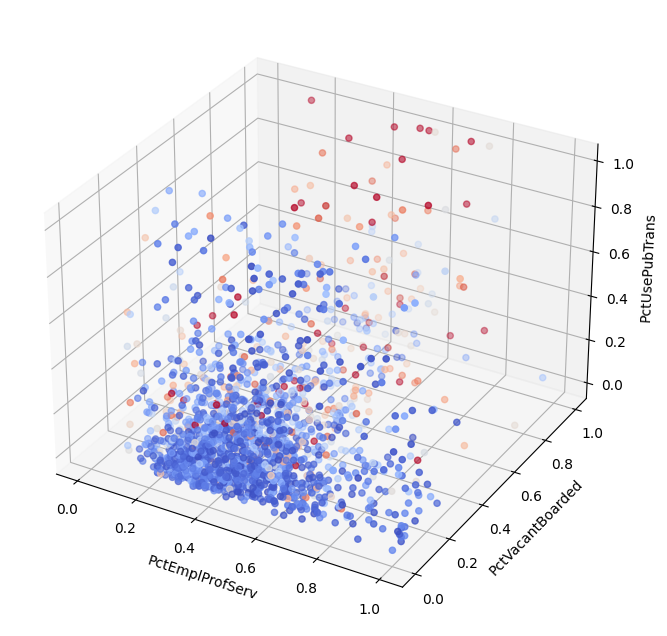

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = data['PctEmplProfServ']
y = data['PctVacantBoarded']
z = data['PctUsePubTrans']
c = data['ViolentCrimesPerPop']

ax.scatter(x, y, z, c=c, cmap='coolwarm')

ax.set_xlabel('PctEmplProfServ')
ax.set_ylabel('PctVacantBoarded')
ax.set_zlabel('PctUsePubTrans')

plt.show()

Esse gráfico mostra a relação entre a porcentagem de trabalhadores empregados em serviços profissionais, a porcentagem de imóveis vagos que estão abandonados ou fechados e a porcentagem de pessoas que usam o transporte público para ir ao trabalho, com a cor dos pontos indicando a taxa de crimes violentos per capita. A partir desse gráfico, podemos ver que as taxas de criminalidade parecem ser mais altas quando há uma maior porcentagem de imóveis vagos e uma maior porcentagem de pessoas que usam o transporte público para ir ao trabalho. Também podemos ver que as taxas de criminalidade tendem a ser mais baixas em áreas com uma maior porcentagem de trabalhadores empregados em serviços profissionais.